In [ ]:
!pip install category_encoders
!pip install imbalanced-learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
%matplotlib inline
import pandas as pd
import numpy as np
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score, roc_curve, precision_score, recall_score, precision_recall_curve, auc
from sklearn.metrics import fbeta_score, precision_recall_fscore_support, PrecisionRecallDisplay, plot_precision_recall_curve, plot_roc_curve
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("term deposit data.csv")
df.subscribed_flag = df.subscribed_flag.map({'yes': 1, 'no': 0}).astype(int)
orig_df = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed_flag
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8190 fits failed out of a total of 24570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

Best score: 0.9480610055644928 with param: {'C': 13.5, 'class_weight': {0: 1.0, 1: 0.01}, 'fit_intercept': True, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

classification_report :               precision    recall  f1-score   support

           0       0.76      1.00      0.86     10291
           1       0.00      0.00      0.00      3302

    accuracy                           0.76     13593
   macro avg       0.38      0.50      0.43     13593
weighted avg       0.57      0.76      0.65     13593

accuracy_score : 0.7570808504377253
f1_score : 0.0
precision_score : 0.0
recall_score : 0.0
tn, fp, fn, tp
10291 0 3302 0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


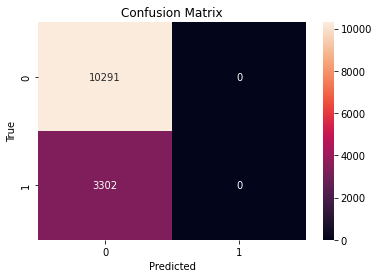

In [ ]:
#weighted lr with grid serach along with binary encoding
df = pd.read_csv("term deposit data.csv")
df.subscribed_flag = df.subscribed_flag.map({'yes': 1, 'no': 0}).astype(int)
orig_df = df.copy()

encoder_job = ce.BinaryEncoder(cols=['job'],return_df=True)
df = encoder_job.fit_transform(df)

encoder_marital = ce.BinaryEncoder(cols=['marital'],return_df=True)
df = encoder_marital.fit_transform(df)

encoder_education = ce.BinaryEncoder(cols=['education'],return_df=True)
df = encoder_education.fit_transform(df)

encoder_default = ce.BinaryEncoder(cols=['default'],return_df=True)
df = encoder_default.fit_transform(df)

encoder_housing = ce.BinaryEncoder(cols=['housing'],return_df=True)
df = encoder_housing.fit_transform(df)

encoder_loan = ce.BinaryEncoder(cols=['loan'],return_df=True)
df = encoder_loan.fit_transform(df)

encoder_contact = ce.BinaryEncoder(cols=['contact'],return_df=True)
df = encoder_contact.fit_transform(df)

encoder_month = ce.BinaryEncoder(cols=['month'],return_df=True)
df = encoder_month.fit_transform(df)

encoder_day_of_week = ce.BinaryEncoder(cols=['day_of_week'],return_df=True)
df = encoder_day_of_week.fit_transform(df)

encoder_poutcome = ce.BinaryEncoder(cols=['poutcome'],return_df=True)
df = encoder_poutcome.fit_transform(df)

target_col = "subscribed_flag"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

target_col = "subscribed_flag"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = False)

from sklearn.linear_model import LogisticRegression
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2", "none"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }
lr_model = LogisticRegression(random_state=0)

# define evaluation procedure
grid = GridSearchCV(lr_model, hyperparam_grid, scoring="roc_auc", cv=3, n_jobs=-1, refit=True)
grid.fit(X,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

lr_model = LogisticRegression(random_state=0, class_weight = grid.best_params_['class_weight'], C = grid.best_params_['C'], fit_intercept = grid.best_params_['fit_intercept'], penalty =grid.best_params_['penalty'])
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print("classification_report : " + str(classification_report(y_test, y_pred)))

print("accuracy_score : " + str(accuracy_score(y_test, y_pred)))
print("f1_score : " + str(f1_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " + str(recall_score(y_test, y_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn, fp, fn, tp")
print(tn, fp, fn, tp)

In [ ]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
subscribed_flag      int64
dtype: object

In [ ]:
df.job.drop_duplicates()

0          housemaid
1           services
3             admin.
7        blue-collar
8         technician
15           retired
19        management
20        unemployed
27     self-employed
29           unknown
41      entrepreneur
205          student
Name: job, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


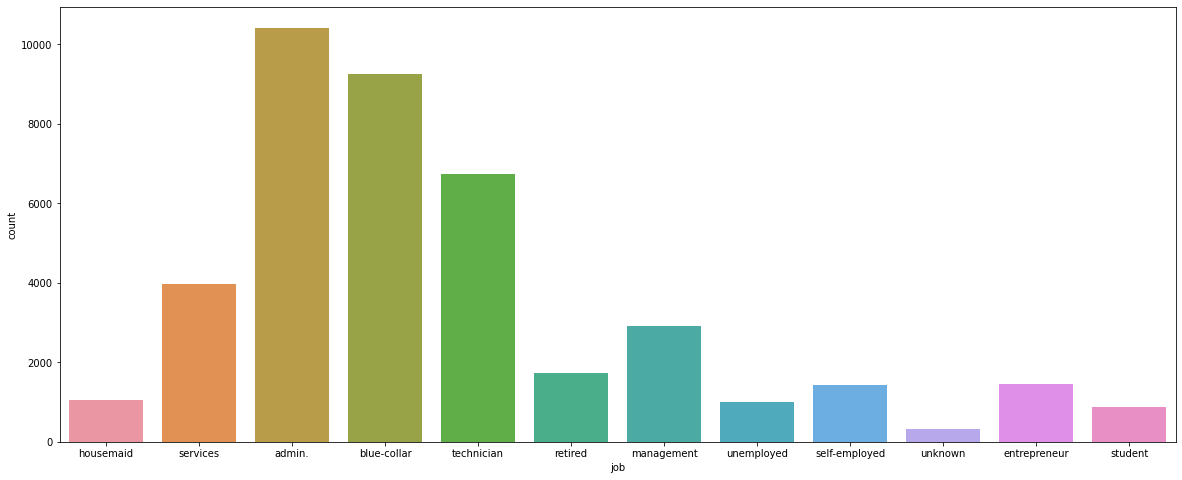

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['job'])
plt.show()

In [ ]:
df.marital.drop_duplicates()

0      married
8       single
13    divorced
40     unknown
Name: marital, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


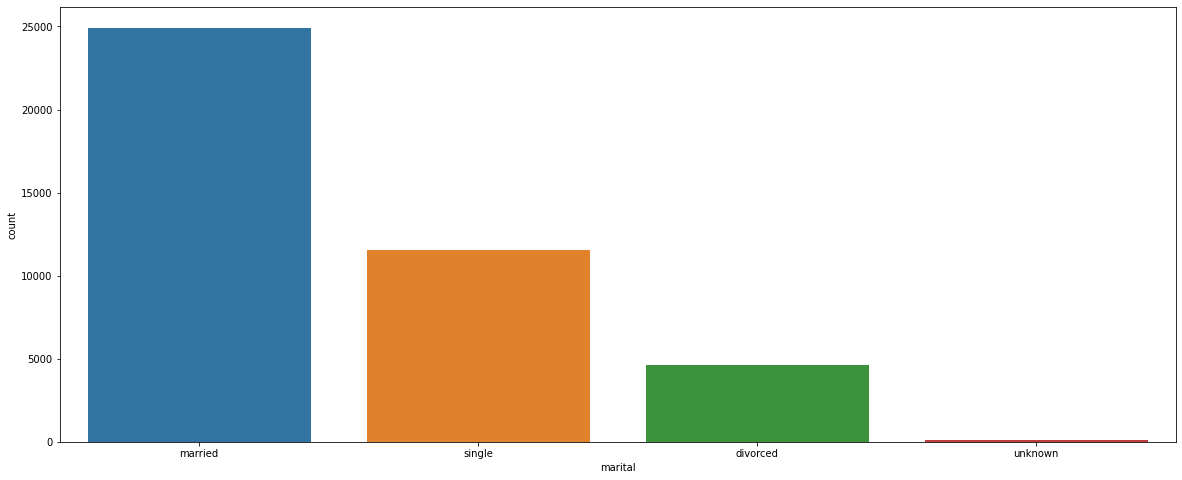

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['marital'])
plt.show()

In [ ]:
df.education.drop_duplicates()

0                  basic.4y
1               high.school
3                  basic.6y
5                  basic.9y
6       professional.course
7                   unknown
25        university.degree
5393             illiterate
Name: education, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


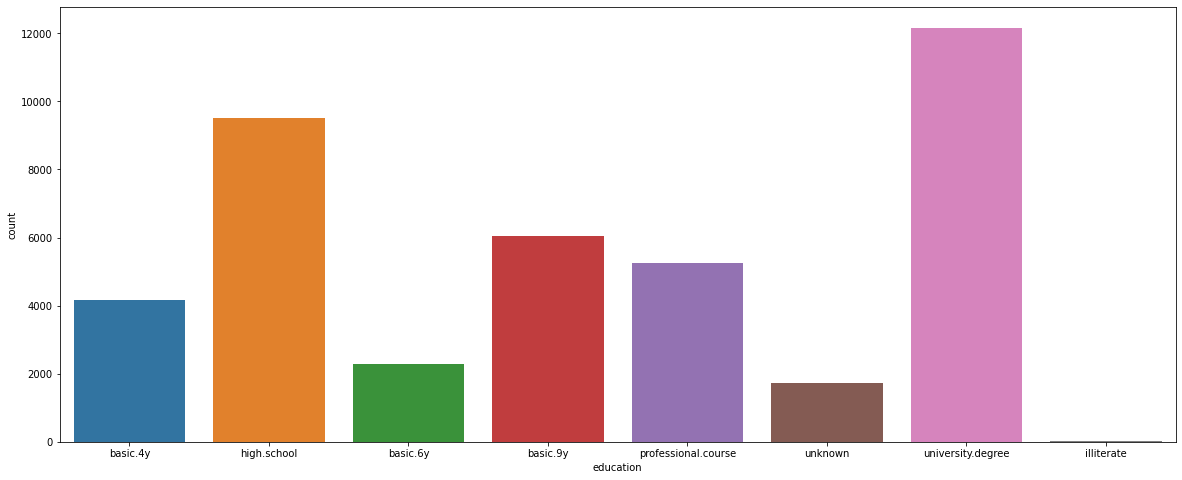

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['education'])
plt.show()

In [ ]:
df.default.drop_duplicates()

0             no
1        unknown
21580        yes
Name: default, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


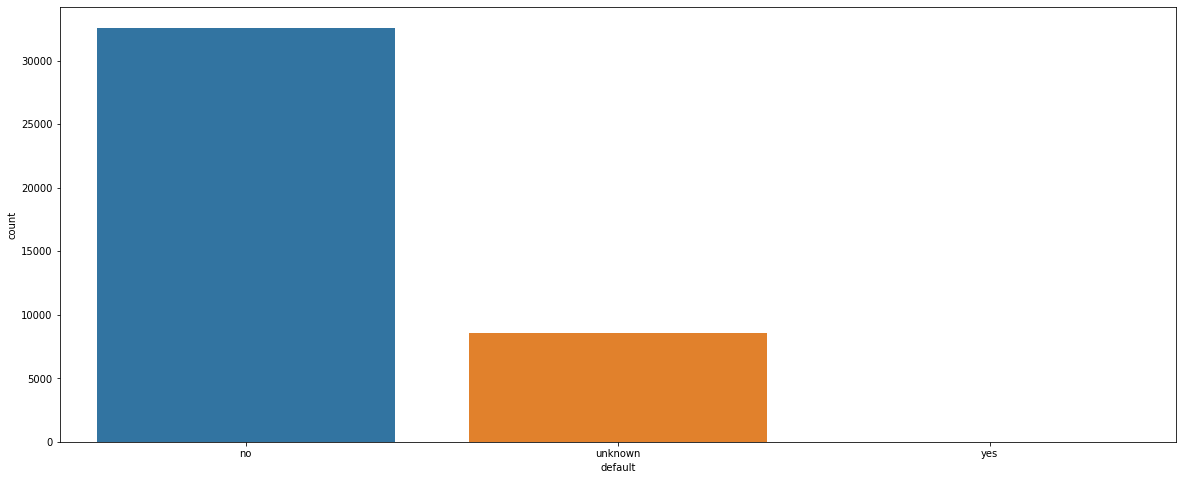

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['default'])
plt.show()

In [ ]:
df.loan.drop_duplicates()

0          no
4         yes
29    unknown
Name: loan, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


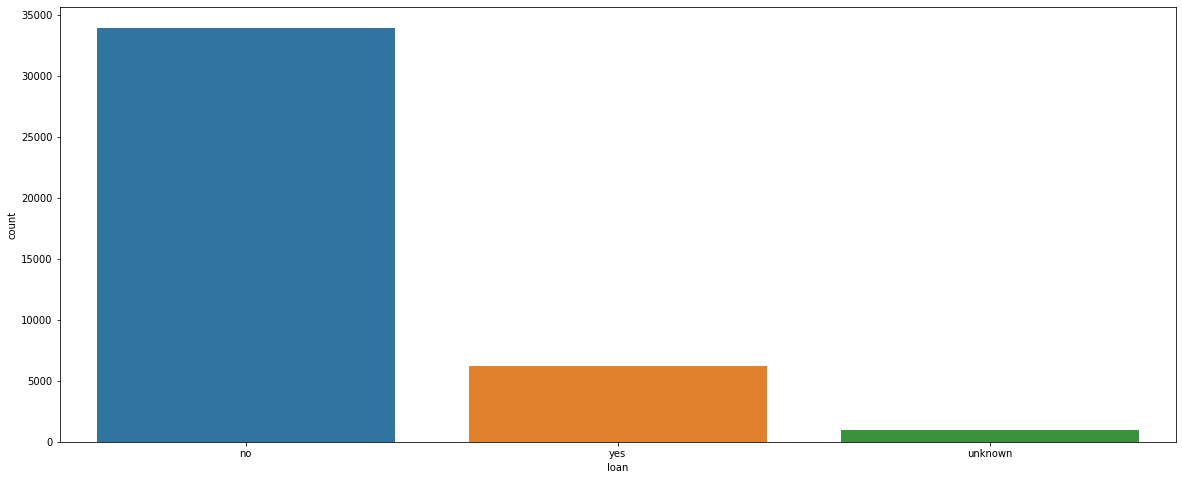

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['loan'])
plt.show()

In [ ]:
df.housing.drop_duplicates()

0          no
2         yes
29    unknown
Name: housing, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


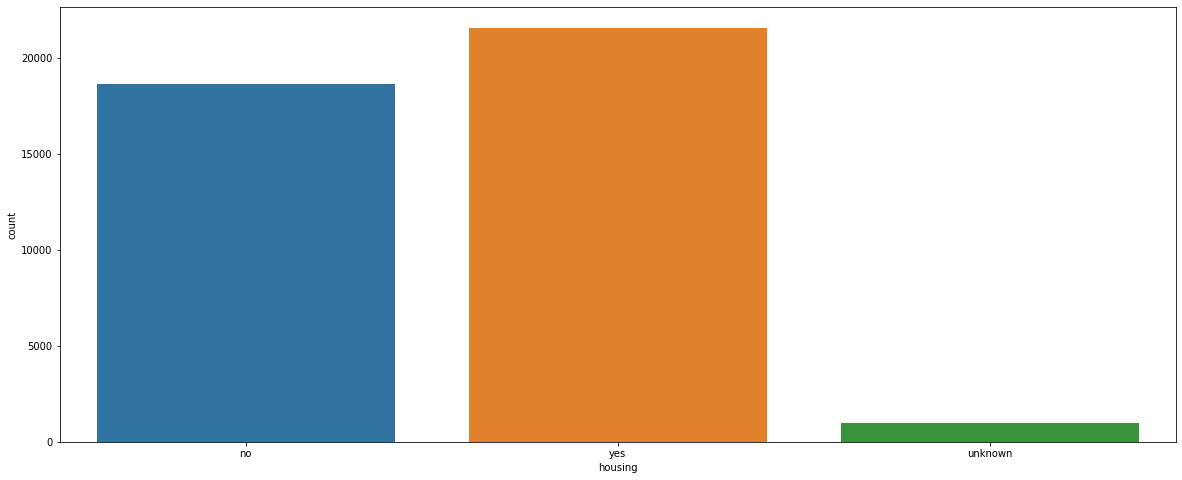

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['housing'])
plt.show()

In [ ]:
df.poutcome.drop_duplicates()

0        nonexistent
24013        failure
24108        success
Name: poutcome, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


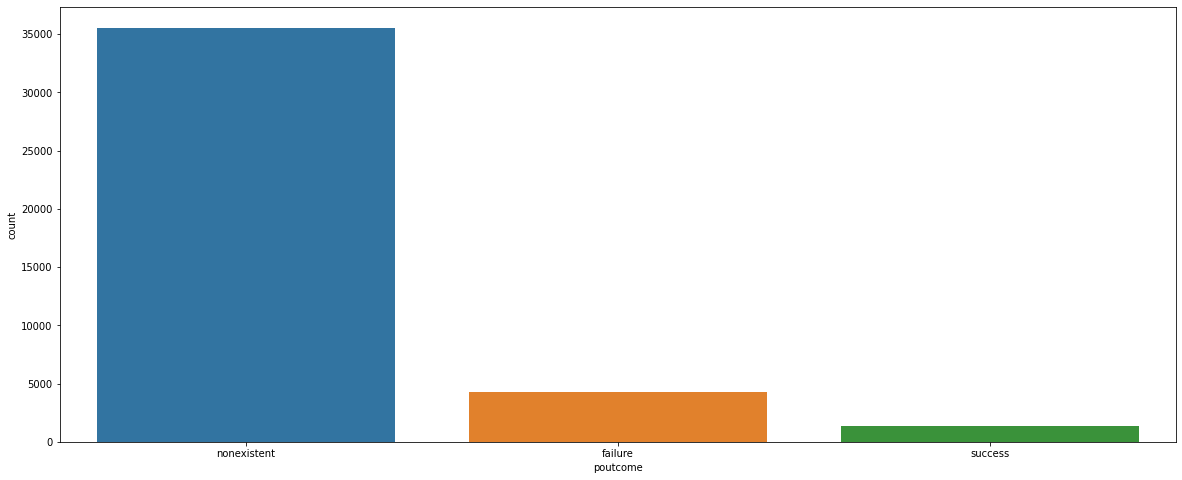

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['poutcome'])
plt.show()

In [ ]:
df.contact.drop_duplicates()

0        telephone
12357     cellular
Name: contact, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


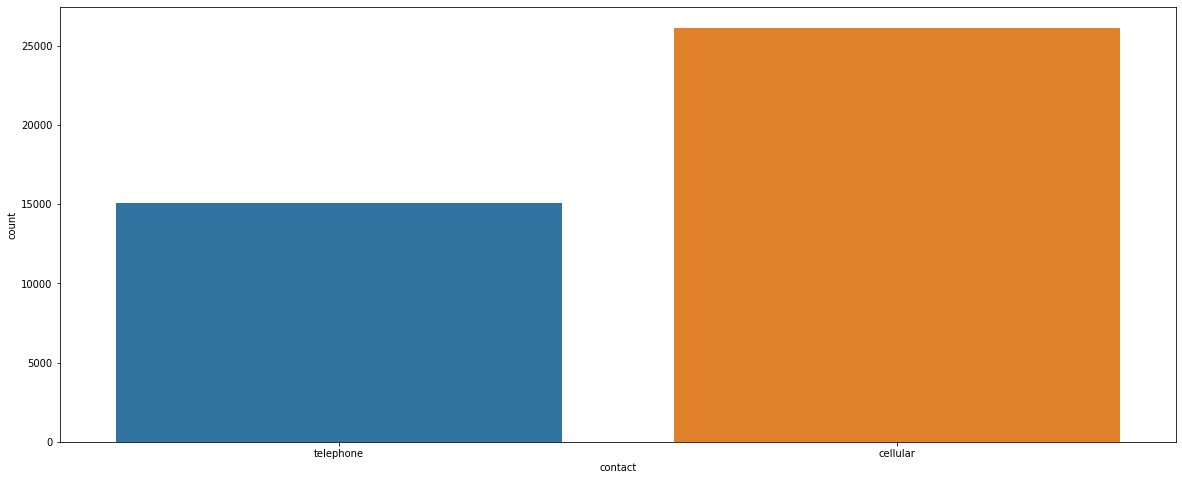

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['contact'])
plt.show()

In [ ]:
df.month.drop_duplicates()

0        may
7763     jun
12137    jul
18822    aug
23997    oct
24064    nov
27680    dec
27690    mar
27972    apr
37887    sep
Name: month, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


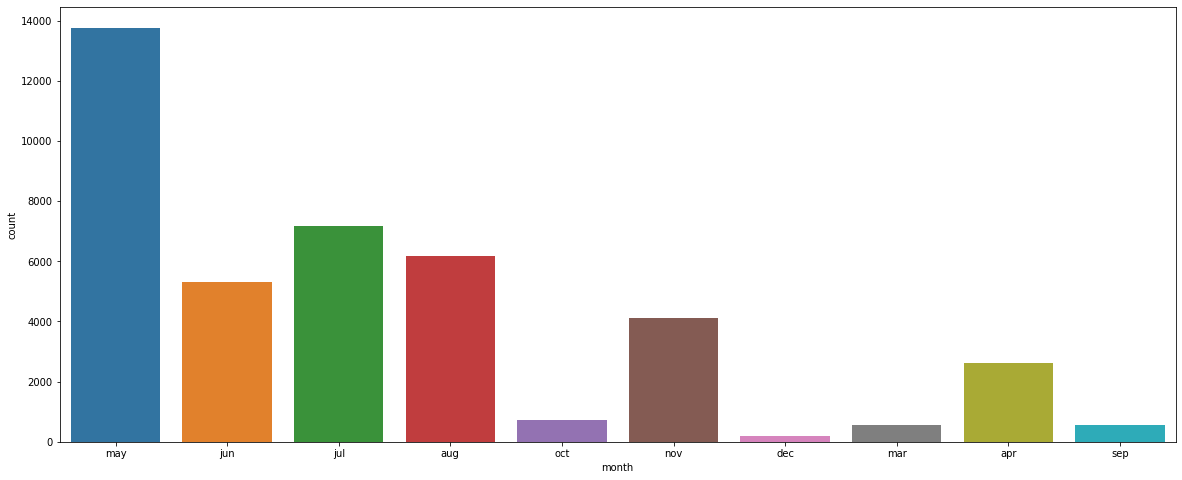

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['month'])
plt.show()

In [ ]:
df.day_of_week.drop_duplicates()

0       mon
360     tue
756     wed
1146    thu
1579    fri
Name: day_of_week, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


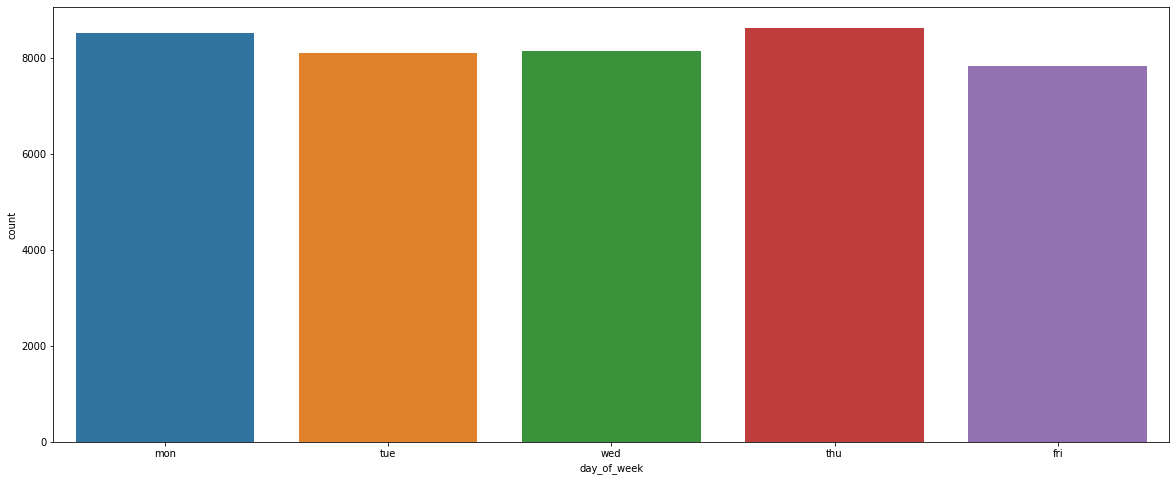

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(df['day_of_week'])
plt.show()

In [ ]:
encoder_job = ce.BinaryEncoder(cols=['job'],return_df=True)
df = encoder_job.fit_transform(df)

encoder_marital = ce.BinaryEncoder(cols=['marital'],return_df=True)
df = encoder_marital.fit_transform(df)

encoder_education = ce.BinaryEncoder(cols=['education'],return_df=True)
df = encoder_education.fit_transform(df)

encoder_default = ce.BinaryEncoder(cols=['default'],return_df=True)
df = encoder_default.fit_transform(df)

encoder_housing = ce.BinaryEncoder(cols=['housing'],return_df=True)
df = encoder_housing.fit_transform(df)

encoder_loan = ce.BinaryEncoder(cols=['loan'],return_df=True)
df = encoder_loan.fit_transform(df)

encoder_contact = ce.BinaryEncoder(cols=['contact'],return_df=True)
df = encoder_contact.fit_transform(df)

encoder_month = ce.BinaryEncoder(cols=['month'],return_df=True)
df = encoder_month.fit_transform(df)

encoder_day_of_week = ce.BinaryEncoder(cols=['day_of_week'],return_df=True)
df = encoder_day_of_week.fit_transform(df)

encoder_poutcome = ce.BinaryEncoder(cols=['poutcome'],return_df=True)
df = encoder_poutcome.fit_transform(df)

In [ ]:
df.head()

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,day_of_week_0,day_of_week_1,day_of_week_2,duration,campaign,pdays,previous,poutcome_0,poutcome_1,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed_flag
0,56,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,261,1,999,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,149,1,999,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,226,1,999,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,151,1,999,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,307,1,999,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
target_col = "subscribed_flag"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [ ]:
# import linrary
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)
xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print(f'Accuracy score is: {xgb_score}')
# f1 score
print(f1_score(y_test, xgb_y_predict), recall_score(y_test, xgb_y_predict))


AttributeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test, rfc_pred), f1_score(y_test, rfc_pred), recall_score(y_test, rfc_pred))


0.7613477525196792 0.07472903593839134 0.039672925499697156


In [ ]:
# class count
subscribed_flag_class_count, non_subscribed_flag_class_count = df['subscribed_flag'].value_counts()

# Separate class
non_subscribed_flag_class_count = df[df['subscribed_flag'] == 0]
subscribed_flag_class_count = df[df['subscribed_flag'] == 1]# print the shape of the class
print('subscribed_flag_class: ', subscribed_flag_class_count.shape)
print('non_subscribed_flag_class: ', non_subscribed_flag_class_count.shape)

subscribed_flag_class:  (4640, 39)
non_subscribed_flag_class:  (36548, 39)


Random Under-Sampling
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

Random Over-Sampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set

Always split into test and train sets BEFORE trying oversampling techniques!

Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [ ]:
#Upsampling subscribed_flag
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_subscribed = X[X.subscribed_flag==0]
subscribed = X[X.subscribed_flag==1]

# upsample minority
subscribed_upsampled = resample(subscribed,
                          replace=True, # sample with replacement
                          n_samples=len(not_subscribed), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_subscribed, subscribed_upsampled])

# check new class counts
upsampled.subscribed_flag.value_counts()


1    26257
0    26257
Name: subscribed_flag, dtype: int64

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.subscribed_flag
X_train = upsampled.drop('subscribed_flag', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, upsampled_pred), f1_score(y_test, upsampled_pred), recall_score(y_test, upsampled_pred))

0.7630397998970058 0.10800332317917474 0.05905511811023622


In [ ]:
df = pd.read_csv("term deposit data.csv")
df.subscribed_flag = df.subscribed_flag.map({'yes': 1, 'no': 0}).astype(int)
orig_df = df.copy()
df.head()

encoder_job = ce.BinaryEncoder(cols=['job'],return_df=True)
df = encoder_job.fit_transform(df)

encoder_marital = ce.BinaryEncoder(cols=['marital'],return_df=True)
df = encoder_marital.fit_transform(df)

encoder_education = ce.BinaryEncoder(cols=['education'],return_df=True)
df = encoder_education.fit_transform(df)

encoder_default = ce.BinaryEncoder(cols=['default'],return_df=True)
df = encoder_default.fit_transform(df)

encoder_housing = ce.BinaryEncoder(cols=['housing'],return_df=True)
df = encoder_housing.fit_transform(df)

encoder_loan = ce.BinaryEncoder(cols=['loan'],return_df=True)
df = encoder_loan.fit_transform(df)

encoder_contact = ce.BinaryEncoder(cols=['contact'],return_df=True)
df = encoder_contact.fit_transform(df)

encoder_month = ce.BinaryEncoder(cols=['month'],return_df=True)
df = encoder_month.fit_transform(df)

encoder_day_of_week = ce.BinaryEncoder(cols=['day_of_week'],return_df=True)
df = encoder_day_of_week.fit_transform(df)

encoder_poutcome = ce.BinaryEncoder(cols=['poutcome'],return_df=True)
df = encoder_poutcome.fit_transform(df)

target_col = "subscribed_flag"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27, shuffle = False)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

print('accuracy ' + str(accuracy_score(y_test, smote_pred)))
print('f1 score ' + str(f1_score(y_test, smote_pred)))
print('recall score ' + str(recall_score(y_test, smote_pred)))

accuracy 0.8989997086530057
f1 score 0.5493934142114384
recall score 0.526578073089701


In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

NameError: ignored

|--- feature_37 <= 5087.65
|   |--- feature_27 <= 172.50
|   |   |--- feature_29 <= 11.00
|   |   |   |--- feature_27 <= 147.50
|   |   |   |   |--- feature_34 <= 93.56
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_34 >  93.56
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_27 >  147.50
|   |   |   |   |--- feature_27 <= 164.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_27 >  164.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_29 >  11.00
|   |   |   |--- feature_27 <= 123.50
|   |   |   |   |--- feature_27 <= 77.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_27 >  77.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_27 >  123.50
|   |   |   |   |--- feature_33 <= -1.75
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_33 >  -1.75
|   |   |   |   |   |--- class: 0
|   |--- feature_27 >  172.50
|   |   |--- feature_29 <= 16.50
|   |   |   |--- feature_28 <= 6.50
|   |   |   |   |--- fea

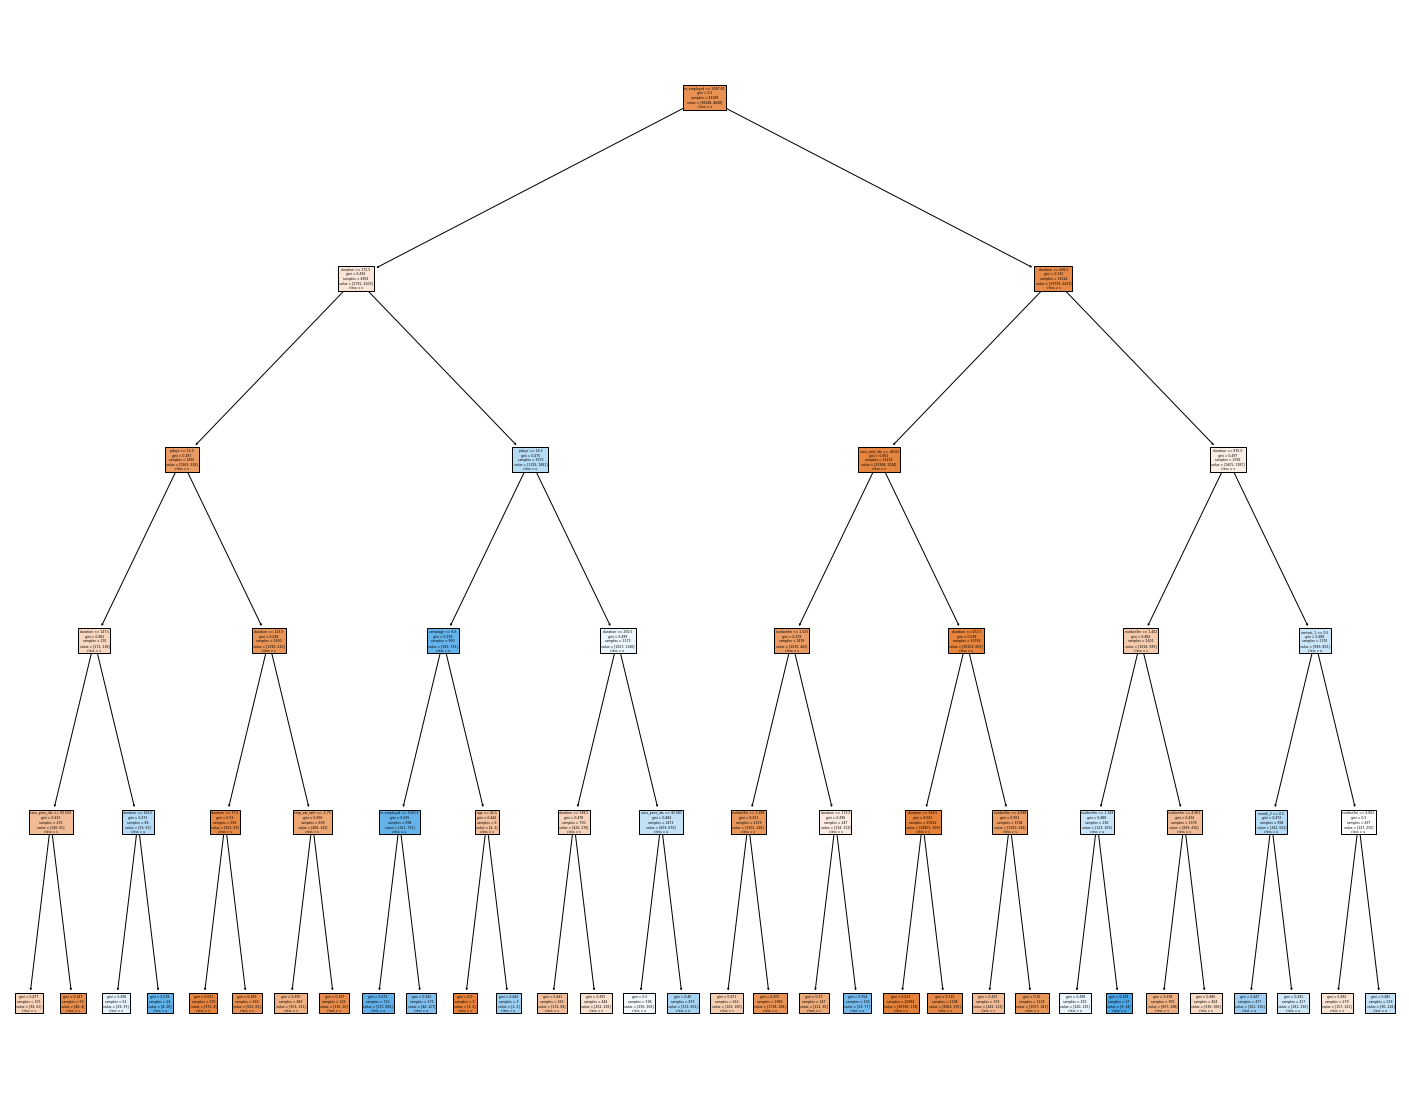

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=5)
tree_classifier.fit(X,y)

txt_tree = export_text(tree_classifier)
print(txt_tree)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_classifier, 
                   feature_names=X.columns,  
                   class_names='subscribed_flag',
                   filled=True)

In [ ]:
tree_classifier.predict_proba([[4.5,2]]), tree_classifier.predict([[4.5,2]])
